# Practica: Deteccion de rostros con OpenCV


## Cruz David Hernandez Antunez 15111430

In [1]:
# importando librerias para mostrar imagenes de explicacion
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


La deteccion de rostros es una tecnica que identifica o localiza rostros humanos en imagenes digitales. un ejemplo tipico de deteccion de rostros ocurre cuando tomamos fotografias a traves de nuestros telefonos inteligentes, y detecta instantaneamente rostros en la imagen. La deteccion de rostros es diferente del reconocimiento de rostros. La deteccion de rostros detecta simplemente la presencia de rostros en una imagen, mientras que el reconocimiento facial implica identificar de quien es el rostro. En esta practica, solo trataremos con el primero

La deteccion de rostros se realiza mediante el uso de clasificadores. un clasificador es esencialmente un algoritmo que decide si una imagen dada es positiva(cara) o negativa(no una cara). Un clasificador necesita ser entrenado en miles de imagenes con y sin caras. afortunadamente, OpenCv ya tiene dos clasificadores de deteccion de rostros previamente entrenados, que pueden usarse facilmente en un programa. Los dos clasificadores son:


Haar Classifier.

Local Binary Pattern (LBP) Classifier.

En esta practica, solo discutiremos el clasificador Haar.

### Haar feature-based cascade classifiers.

Las caracteristicas tipo Haar son caracteristicas de imagenes digitales utilizadas en el reconocimiento de objetos. Debe su nombre a su similitus intuitiva con las wavelets de Haar y se usaron en el primer detector facial en tiempo real. Paul Viola y Michael Jones en su articulo titulado "Deteccion rapida de objetos usando una casacada mejorada de caracteristicas simples" utilizaron la idea del clasificador de caracteristicas de Haar basado en las waveles de Haar. Este clasificador es ampliamente utilizado para tareas como la deteccion de rostros en la industria de la vision por computadora

El clasificador en cascada de Haar emplea un efocque de aprendizaje automatico para la deteccion de objetos visuales que es capaz de procesar imagenes extremadamente rapido y lograr altas tasas de deteccion. Esto puede atribuirse a tres razones principales:

1.- El clasificador de Haar emplea el concepto de 'imagen integral' que permite que las caracteristicas utilizadas por el detector se calculen muy rapidamente

2.- El algoritmo de aprendizaje se basa en AdaBoost. Selecciona una pequeña cantidad de caracteristicas importantes de un conjunto grande y ofrece clasificadores altamente eficientes.

3.- Los clasificadores mas complejos se combinan para formar una 'cascada' que descarta las regiones no faciales en una imagen, gastando asi mas computo en regiones prometedoras similares a objetos

### Como funciona el algoritmo en las imagenes en pasos:

### 1.- Extraccion de 'caracteristicas Haar'

Despues de que la enorme cantidad de datos de entrenamiento (en forma de imagenes) se introduce en el sistema, el clasificador comienza extrayendo las caracteristicas de Haar de cada imagen. Las caracteristicas de Haar son una especie de nucleos de convolucion que detectan principalmente si una caracteristicas adecuada esta presente en una imagen o no. Algunos ejemplos de caracteristicas de Haar se menciona a continuacion:

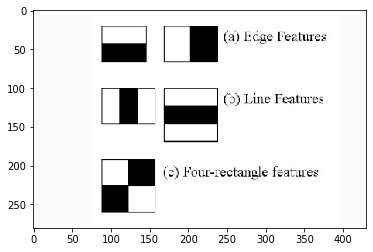

In [2]:
imagen1=mpimg.imread('imagen1.png')
imgplot=plt.imshow(imagen1)
plt.show()

Estas caracteristicas de Haar son como ventanas y se colocan sobre imágenes para calcular una sola caracteristicas. La caracteristica es esencialmente un valor unico obtenido restando la suma de los pixeles debajo de la region blanca y la debajo del negro. El proceso se puede visualizar fácilmente en el siguiente ejemplo.    

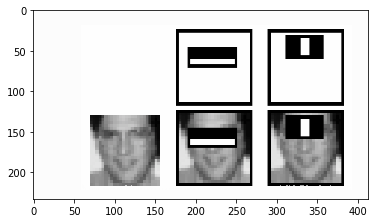

In [3]:
imagen2=mpimg.imread('imagen2.png')
imgplot=plt.imshow(imagen2)
plt.show()

Para fines de demostracion, digamos que solo estamos extrayendo dos caracteristicas, por lo tanto, solo tenemos dos ventanas aqui. La primera caracteristica se basa en el punto de que la region del ojo es mas oscura que las mejillas adyacentes y la region de la nariz. La segunda caracteristicas se centra en el hecho de que los ojos son algo mas oscuros en comparacion con el puente de la nariz. por lo tanto cuando la ventana caracteristica se mueve sobre los ojos, calculara un solo valor. Este valor se comparará con algun umbral y, si se pasa, concluira que hay una ventaja aqui o alguna caracteristica

### 2. Concepto de 'imagenes integrales'

El algoritmo propuesto por viola Jones utiliza un tamaño de ventana base 24x24, y eso daria como resultado que se calculen mas de 180,000 caracteristicas en esta ventana. Imagina calcular la diferencia de pixeles para todas las funciones? La solucion ideada para este proceso computacionalmente intencisvo es optar por el concepto de imagen integral. La imagen integral significa que para encontrar la suma de todos los pixeles debajo de cualquier rectangulo, simplemente necesitamos los cuatro valores de la esquina

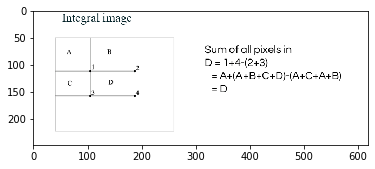

In [4]:
imagen3=mpimg.imread('imagen3.png')
imgplot=plt.imshow(imagen3)
plt.show()

Esto significa que para calcular la suma de pixeles en cualquier ventana de caracteristicas, no necesitamos sumarlos individualmente. Todo lo que necesitamos es calcular la imagen integral usando los 4 valores de las esquinas. El siguiente ejemplo hara que el proceso sea transparente

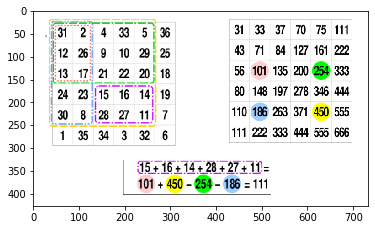

In [5]:
imagen4=mpimg.imread('imagen4.png')
imgplot=plt.imshow(imagen4)
plt.show()

### 3. Adaboost': para mejorar la precision del clasificador

como se señalo anteriormente, mas de 180,000 valores de caracteristicas resultan dentro de una ventana de 24x24. sin embargo, no todas las caracteristicas son utiles para identificar una cara. Para seleccionar solo la mejor caraccteristica de toda la porcion, se utiliza un algoritmo de aprendizaje automatico llamado Adaboost. Lo que esencialmente hace es que se lecciona solo aquellas caracteristicas que ayudan a mejorar la precision del clasificador. Lo hace al construir un clasificador fuerte que es una combinacion lineal de varios clasificadores debiles. Esto reduce drasticamente la cantidad de funciones a alrededor de 6000  de al rededor de 180,00

### 4. Uso de 'clasificadores cascada'

Otra forma en la que viola jones se aseguro de que el algoritmo funcione rapidamente es mediante el uso de una casacada de clasificadores. el clasificador en cascada consiste esencialmente en tapas donde cada estapa consiste en un clasificador fuerte. Esto es beneficiaoso ya que elimina la necesidad de aplicar todas las funciones a la vez en una ventana. Mas bien, agrupa las caracteristicas en ventanas secundarias separadas y el clasificador en cada etapa determina si la ventana secundaria es o no una cara. En caso de que no sea asi, la subventa se descarta junto con las caracteristicas de esa ventana. Si la subventa se mueve mas alla del clasificador, continua a la siguiente etapa donde se aplica la segunda estapa de caracteristicas. El proceso se puede entender con la ayuda del siguiente diagrama

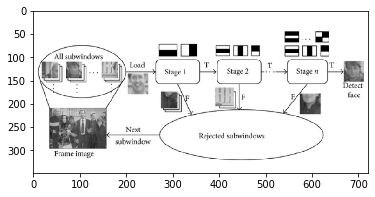

In [6]:
imagen5=mpimg.imread('imagen5.png')
imgplot=plt.imshow(imagen5)
plt.show()

### 5.- deteccion de rostros con opencv